In [11]:
import pandas as pd
import matplotlib.pylab as plt
import glob
import numpy as np
from tqdm.notebook import tqdm

from matplotlib.cm import rainbow

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3126453290.py:22: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_b = (1 / m) * _buff_
/var/folders/_r/6hvfrncn0gb3rk22vwnq62gh0000gn/T/ipykernel_1227/3126453290.py:22: RuntimeWarning: invalid value encountered in double_scalars
  sigma_b = (1 / m) * _buff_


  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

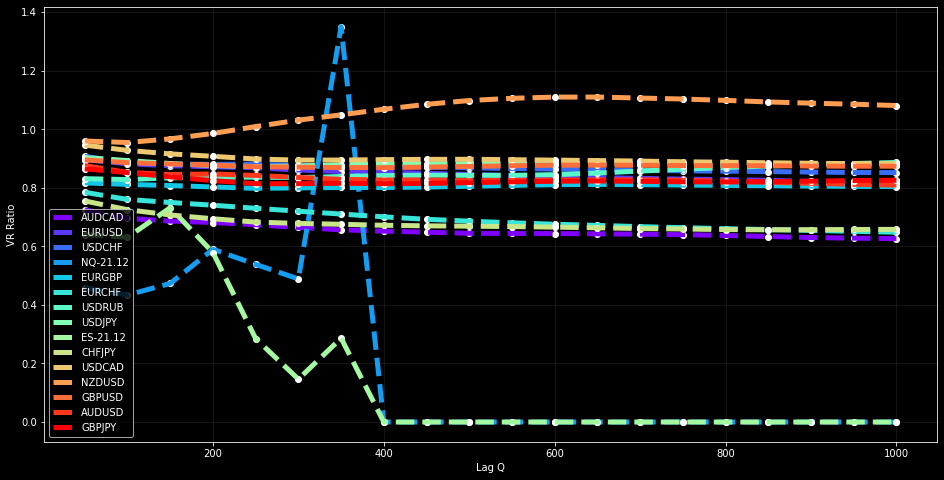

In [20]:
def variance_ratio(q_position, df: pd.DataFrame):
    MR = list()

    result_array = list()
    q_array = list()
    #   Create time_lags like 2 ** k
    #time_lags = [1] + [2 ** i for i in range(1, q_position+1)]
    ret = np.log(df.close.dropna())
    #ret = ret.pct_change()[1:].dropna()
    #ret = ret.diff().dropna()
    time_lags = np.arange(0, 2 ** q_position, 50)
    for EA, time_lag in tqdm(enumerate(time_lags), total=len(time_lags), leave=False):
        buff_size = len(ret)
        means = (1 / buff_size) * np.sum(ret.diff().dropna())
        m = time_lag * (buff_size - time_lag + 1) * (1 - (time_lag / buff_size))
        sigma_a = (1 / (buff_size - 1)) * np.sum(np.square(ret.diff().dropna() - means))
        _buff_ = 0
        _arr_buff_ = ret.values
        for k in range(time_lag, buff_size):
            _buff_ += np.square(_arr_buff_[k] - _arr_buff_[k - time_lag] - time_lag * means)
        del _arr_buff_
        sigma_b = (1 / m) * _buff_
        result = (sigma_b / sigma_a)
        plt.plot(time_lag, result, 'o', color='white')
        plt.grid(alpha=.1)
        result_array.append(result)
        q_array.append(time_lag)
    return result_array, q_array


RESULTS = list()
files = glob.glob('zip_data/*.csv')[:]
colors = rainbow(np.linspace(0, 1, len(files)))
plt.figure(figsize=(16,8))
plt.grid()
plt.ylabel('VR Ratio')
plt.xlabel('Lag Q')

for arrow, _ in tqdm(enumerate(files), total=len(files)):
    name = _.split('/')[1][:-4]
    data = pd.read_csv(_)
    res, q = variance_ratio(10, data.dropna())
    plt.plot(q, res, '--', color=colors[arrow], linewidth=5, label=name)
    RESULTS.append([name, res, q])
plt.legend()
plt.show()

In [10]:
data =pd.read_csv('zip_data/USDCAD.csv')
data

,time,open,high,low,close
0,2018-11-01 00:15:00,1.315990,1.316140,1.315855,1.316000
1,2018-11-01 00:16:00,1.316000,1.316080,1.315900,1.316040
2,2018-11-01 00:17:00,1.316040,1.316040,1.315870,1.315975
3,2018-11-01 00:18:00,1.315975,1.316175,1.315975,1.316010
4,2018-11-01 00:19:00,1.316010,1.316065,1.315995,1.315995
...,...,...,...,...,...
1071359,2021-11-13 00:55:00,1.254985,1.255100,1.254980,1.255030
1071360,2021-11-13 00:56:00,1.255030,1.255175,1.254990,1.255175
1071361,2021-11-13 00:57:00,1.255175,1.255305,1.255175,1.255305
1071362,2021-11-13 00:58:00,1.255305,1.255345,1.255300,1.255305


array([[5.00000000e-01, 0.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.96078431e-03, 7.09281308e-01, 9.23289106e-01, 1.00000000e+00],
       [5.03921569e-01, 9.99981027e-01, 7.04925547e-01, 1.00000000e+00],
       [1.00000000e+00, 7.00543038e-01, 3.78411050e-01, 1.00000000e+00],
       [1.00000000e+00, 1.22464680e-16, 6.12323400e-17, 1.00000000e+00]])